In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime, timedelta
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [2]:
# Specify the file path
cinf_file = 'Consumer_Goods_Inflation.csv'

# Read the CSV file into a DataFrame
df_cinf = pd.read_csv(cinf_file)

# Display the first few rows of the DataFrame
print(df_cinf.head())

# Generate descriptive statistics of the DataFrame
describe_cinf = df_cinf.describe()

# Display the descriptive statistics
print(describe_cinf)

       DATE  Consumer good inflation
0  1/1/1974                     11.1
1  1/1/1975                      9.1
2  1/1/1976                      5.7
3  1/1/1977                      6.5
4  1/1/1978                      7.6
       Consumer good inflation
count                49.000000
mean                  3.959184
std                   2.980207
min                  -0.400000
25%                   2.100000
50%                   3.000000
75%                   4.700000
max                  13.500000


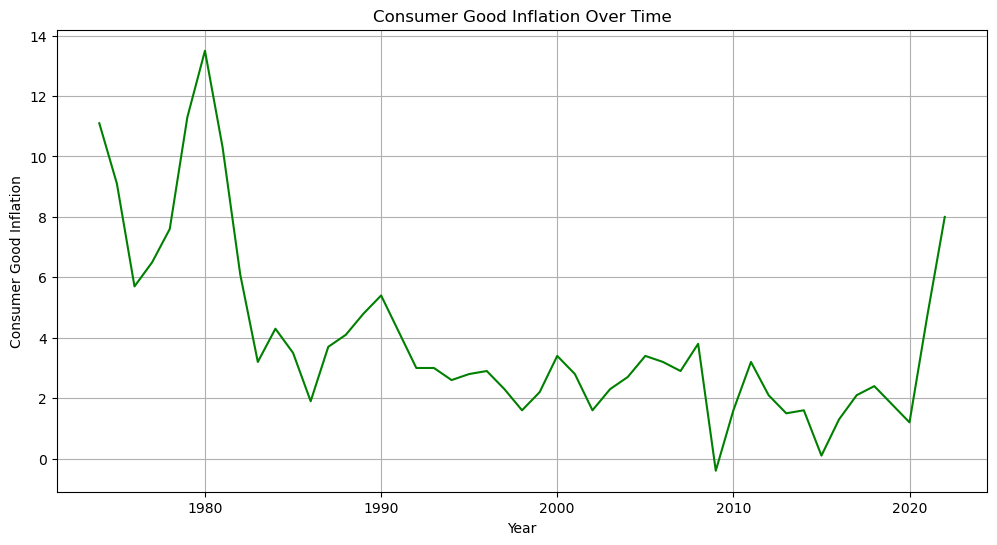

In [3]:
# Convert 'DATE' column to datetime and set it as the index
df_cinf['DATE'] = pd.to_datetime(df_cinf['DATE'])
df_cinf.set_index('DATE', inplace=True)

# Create a time series plot for 'Consumer good inflation'
plt.figure(figsize=(12, 6))
plt.plot(df_cinf.index, df_cinf['Consumer good inflation'], color='green')
plt.xlabel('Year')
plt.ylabel('Consumer Good Inflation')
plt.title('Consumer Good Inflation Over Time')
plt.grid()
plt.show()

In [6]:
# Convert 'DATE' column to datetime and set it as the index
df_cinf['DATE'] = pd.to_datetime(df_cinf['DATE'])
df_cinf.set_index('DATE', inplace=True)

# Create a DataFrame with only the necessary columns
data_cinf = df_cinf[['Consumer good inflation']]

# Calculate the 5-year moving average
data_cinf['Consumer Good Inflation_MA'] = data_cinf['Consumer good inflation'].rolling(window=5).mean()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(data_cinf.index, data_cinf['Consumer good inflation'], label='Actual Consumer Good Inflation', color='green')
plt.plot(data_cinf.index, data_cinf['Consumer Good Inflation_MA'], label='5-Year Moving Average', linestyle='dashed', color='blue')
plt.xlabel('Year')
plt.ylabel('Consumer Good Inflation')
plt.title('Consumer Good Inflation Over Time with 5-Year Moving Average')
plt.legend()
plt.grid()
plt.show()

KeyError: 'DATE'